<a href="https://colab.research.google.com/github/fajararasy/Tugas-SLO/blob/main/Fajar_Arasy_Isman_data_cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
cd /content/drive/MyDrive/Colab Notebooks 

/content/drive/MyDrive/Colab Notebooks


In [6]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.datasets import data_cancer

In [7]:
# from sklearn.datasets import data_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data_cancer.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
test_X = df.iloc[0:10,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
print(test_X.shape)

(10, 30)


In [114]:
X = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
Y = df.iloc[:,[1]].values

In [115]:
print(Y)

[['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']

In [116]:
target_names = df['diagnosis'].unique()
print(target_names)

['M' 'B']


In [117]:
print(X.shape)
print(Y.shape)

(569, 30)
(569, 1)


In [118]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, Y, random_state=5, test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


In [119]:
# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=3),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="rbf", gamma="auto"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

In [120]:
# train the model
print("[INFO] using '{}' model".format("knn"))
model = models["knn"]
model.fit(trainX, trainY)

[INFO] using 'knn' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [121]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(predictions)

[INFO] evaluating...
['M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'M']


In [122]:
print(classification_report(testY, predictions,
	target_names=target_names))

              precision    recall  f1-score   support

           M       0.89      0.98      0.94        66
           B       0.98      0.83      0.90        48

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



In [123]:
# train the model
print("[INFO] using '{}' model".format("naive_bayes"))
model = models["naive_bayes"]
model.fit(trainX, trainY)

[INFO] using 'naive_bayes' model


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.94      0.97      0.96        66
           B       0.96      0.92      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [125]:
# train the model
print("[INFO] using '{}' model".format("logit"))
model = models["logit"]
model.fit(trainX, trainY)

[INFO] using 'logit' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.93      1.00      0.96        66
           B       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [127]:
# train the model
print("[INFO] using '{}' model".format("svm"))
model = models["svm"]
model.fit(trainX, trainY)

[INFO] using 'svm' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.58      1.00      0.73        66
           B       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
# train the model
print("[INFO] using '{}' model".format("decision_tree"))
model = models["decision_tree"]
model.fit(trainX, trainY)

[INFO] using 'decision_tree' model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.94      0.95      0.95        66
           B       0.94      0.92      0.93        48

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [131]:
# train the model
print("[INFO] using '{}' model".format("random_forest"))
model = models["random_forest"]
model.fit(trainX, trainY)

[INFO] using 'random_forest' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.96      0.98      0.97        66
           B       0.98      0.94      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [133]:
# train the model
print("[INFO] using '{}' model".format("mlp"))
model = models["mlp"]
model.fit(trainX, trainY)

[INFO] using 'mlp' model


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [134]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.87      1.00      0.93        66
           B       1.00      0.79      0.88        48

    accuracy                           0.91       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



# **Artificial Neural Network**

In [135]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os

In [136]:
Y

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
      

In [137]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [138]:
X.shape

(569, 30)

In [141]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X,	np.array(labels), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


In [147]:
#model ANN

model = Sequential(
    [
        Dense(16, activation="relu", input_shape=(30,)), #hidden layer 1
        Dense(16, activation="relu"), #hidden layer 2
        # Dense(16, activation="relu"),
        # Dense(8, activation="relu"),
        Dense(1, activation = "sigmoid"),
    ]
)

In [148]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_59 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [149]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

[INFO] training network...


In [150]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=20)

Epoch 1/20
23/23 [==============================] - 1s 9ms/step - loss: 65.2950 - accuracy: 0.3759 - val_loss: 1.9273 - val_accuracy: 0.5702
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.7625 - accuracy: 0.8024 - val_loss: 0.3819 - val_accuracy: 0.8947
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8875 - val_loss: 0.3709 - val_accuracy: 0.9123
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8925 - val_loss: 0.2666 - val_accuracy: 0.9123
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8725 - val_loss: 0.2196 - val_accuracy: 0.8947
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.8693 - val_loss: 0.7738 - val_accuracy: 0.8333
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8617 - val_loss: 0.2361 - val_accuracy: 0.9211
Epoch 8/20
23/23 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


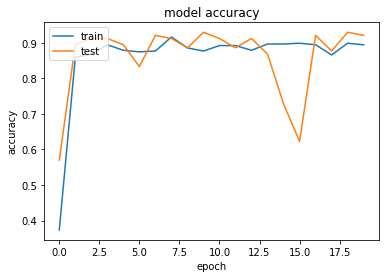

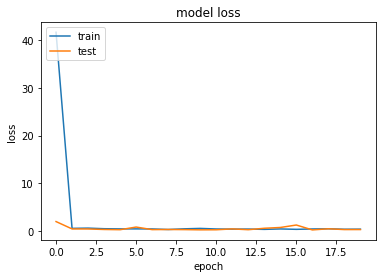

In [151]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()